# Assignment ( Airlines dataset )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing (or) double exponential smoothing.
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
air_data=pd.read_excel('F:\Airlines+Data.xlsx')
air_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

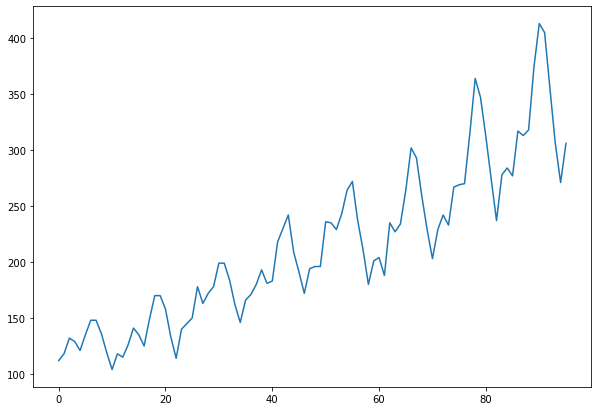

In [4]:
plt.figure(figsize=(10,7))
air_data.Passengers.plot()

In [5]:
air_data.set_index('Month',inplace=True)
air_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# Step 2: Visualize the data

<AxesSubplot:xlabel='Month'>

<Figure size 504x360 with 0 Axes>

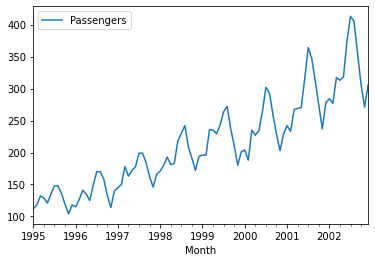

In [6]:
plt.figure(figsize=(7,5))
air_data.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

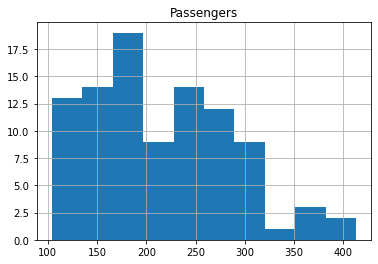

In [7]:
air_data.hist()

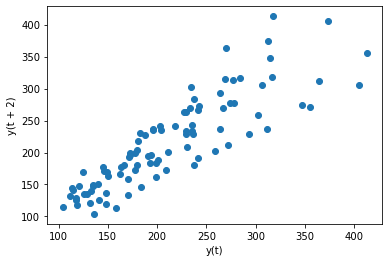

In [8]:
#log plot
from pandas.plotting import lag_plot
lag_plot(air_data,lag=2)
plt.show()

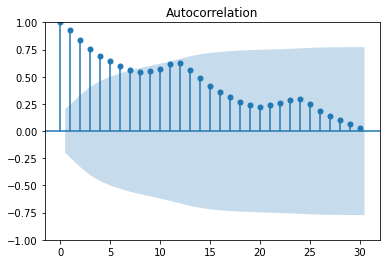

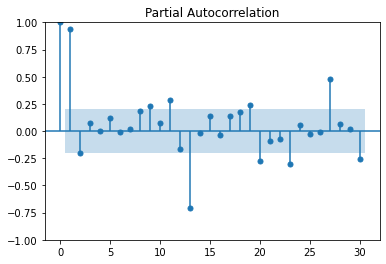

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(air_data,lags=30)
plot_pacf(air_data,lags=30)
plt.show()

# Transform

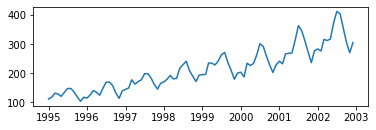

In [10]:
# line plot
plt.subplot(211)
plt.plot(air_data)

# Square root transform

In [11]:
df = pd.DataFrame(air_data.values)
df.columns = ['Passengers']
df['Passengers'] = np.sqrt(df['Passengers'])
df['Passengers']

0     10.583005
1     10.862780
2     11.489125
3     11.357817
4     11.000000
        ...    
91    20.124612
92    18.841444
93    17.492856
94    16.462078
95    17.492856
Name: Passengers, Length: 96, dtype: float64

# Log transform

In [12]:
df = pd.DataFrame(air_data.values)
df.columns = ['Passengers']
df['Passengers'] = np.log(df['Passengers'])
df['Passengers']

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
91    6.003887
92    5.872118
93    5.723585
94    5.602119
95    5.723585
Name: Passengers, Length: 96, dtype: float64

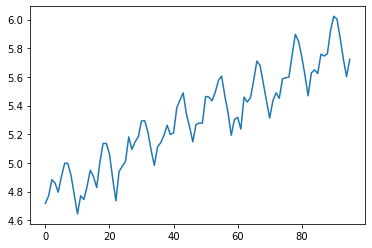

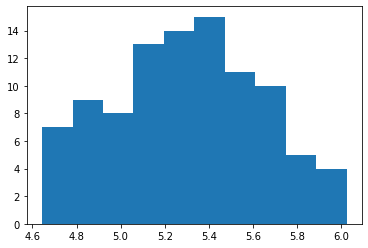

In [13]:
#line plot
plt.plot(df['Passengers'])
plt.show()
#histogram plot
plt.hist(df['Passengers'])
plt.show()

In [14]:
train=air_data.head(81)
test=air_data.tail(15)

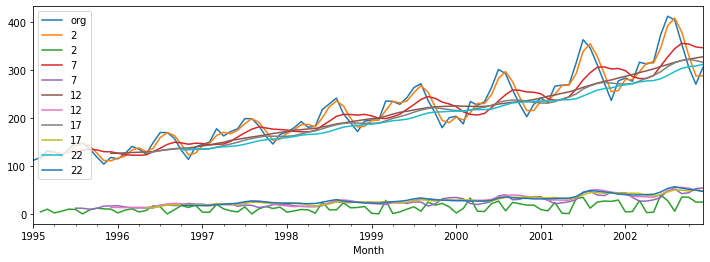

In [15]:
plt.figure(figsize=(12,4))
air_data.Passengers.plot(label='org')
for i in range(2,24,5):
    air_data['Passengers'].rolling(i).mean().plot(label=str(i))
    air_data['Passengers'].rolling(i).std().plot(label=str(i))
plt.legend()
plt.show()

# Timeseries Decomposition Plot

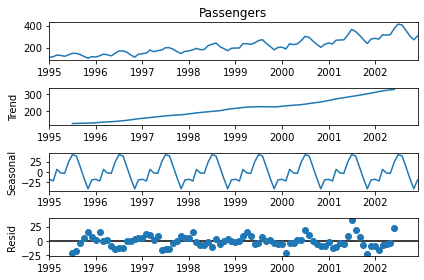

In [16]:
decompose_ts = seasonal_decompose(air_data.Passengers)  
decompose_ts.plot()
plt.show()

# Evaluation Metric MAPE

In [17]:
def MAPE(pred,org):
    temprary = np.abs((pred-org)/org)*100
    return np.mean(temprary)

# Simple Exponential Method

In [18]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.3)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

12.135528024108057

# Holt Exponential Method

In [19]:
h_model = Holt(train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.3)
pred_h = h_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_h,test.Passengers)

20.702728573480663

# Holt winter Exponential smoothing with additive seasonality and additive trend

In [20]:
#add the trend to the model
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.3) 
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

6.19847790450655

# Holt winter Exponential smoothing with multiplicative seasonality and additive trend

In [21]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.3) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

3.2475022770910327

In [22]:
from sklearn.metrics import mean_squared_error
rmse_hwe_mul_add = np.sqrt(mean_squared_error(pred_hwe_mul_add,test.Passengers))
rmse_hwe_mul_add

12.193649087877654

In [23]:
upsampled = air_data.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       135.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       170.0
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30       178.0
1997-07-31       199.0
1997-08-31       199.0


In [24]:
interpolated = upsampled.interpolate(method='linear')
hwe_model_add_add = ExponentialSmoothing(air_data["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()
hwe_model_add_add.forecast(12)

2003-01-01    312.712841
2003-02-01    317.761425
2003-03-01    319.706536
2003-04-01    320.989967
2003-05-01    322.648395
2003-06-01    321.879208
2003-07-01    317.099335
2003-08-01    319.098429
2003-09-01    318.200120
2003-10-01    326.845644
2003-11-01    333.668133
2003-12-01    338.716717
Freq: MS, dtype: float64

In [25]:
interpolated.reset_index(inplace=True)


In [48]:
air_data['t'] = np.arange(1,97)
air_data['t_squared'] = air_data['t']**2
air_data["Passengers_log"] = np.log(air_data['Passengers'])

In [49]:
air_data

,Month,Passengers,t,t_squared,Passengers_log
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [50]:
air_data['month']=air_data.Month.dt.strftime("%b")
air_data['years']=air_data.Month.dt.strftime("%Y")
#pd.get_dummies(air_data['month'])
air_data

,Month,Passengers,t,t_squared,Passengers_log,month,years
0,1995-01-01,112,1,1,4.718499,Jan,1995
1,1995-02-01,118,2,4,4.770685,Feb,1995
2,1995-03-01,132,3,9,4.882802,Mar,1995
3,1995-04-01,129,4,16,4.859812,Apr,1995
4,1995-05-01,121,5,25,4.795791,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002
92,2002-09-01,355,93,8649,5.872118,Sep,2002
93,2002-10-01,306,94,8836,5.723585,Oct,2002
94,2002-11-01,271,95,9025,5.602119,Nov,2002


In [51]:
months=pd.get_dummies(air_data['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
Airlines = pd.concat([air_data,months],axis=1)
Airlines

,Month,Passengers,t,t_squared,Passengers_log,month,years,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='years', ylabel='Passengers'>

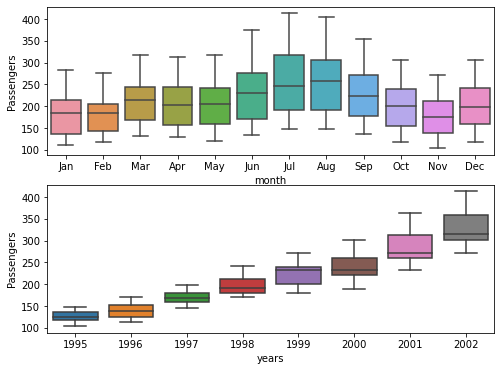

In [53]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="years",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='years', ylabel='Passengers'>

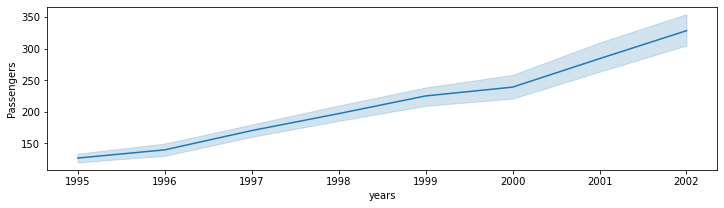

In [54]:
plt.figure(figsize=(12,3))
sns.lineplot(x="years",y="Passengers",data=Airlines)

# Data Splitting

In [55]:
Train = Airlines.head(84) # training data
Test = Airlines.tail(12) # test Data

In [56]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480265

In [57]:
#Exponential
Exp = smf.ols('Passengers_log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315619

In [58]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979331615

In [59]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [60]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612084677

In [61]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Passengers_log~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708624

In [62]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Passengers_log~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.51917254432384

In [63]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


# the final model we can use for assign forecating is Multiplicative Additive Seasonality